# Sarcasm Detection with Machine Learning

Sarcasm means being funny by being the opposite of what you mean. It has been part of every human language for years. Today, it is also used in news headlines and various other social media platforms to gain more attention. Sarcasm detection is a natural language processing and binary classification task. We can train a machine learning model to detect whether or not a sentence is sarcastic using a dataset of sarcastic and non-sarcastic sentences that I found on Kaggle.

https://thecleverprogrammer.com/2021/08/24/sarcasm-detection-with-machine-learning/

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
df= pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines=True)

In [4]:
df

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [5]:
df['headline'] = df['headline'].str.lower()
df['headline'] = df['headline'].str.replace('[^\w\s]','')
df['headline'] = df['headline'].str.replace('\n','')
df['headline'] = df['headline'].str.replace('\d+','',regex=True)
df['headline'] = df['headline'].str.replace('\'','')
df['headline'] = df['headline'].str.replace('\r','')

In [6]:
del df['article_link']

In [7]:
df

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word stream...
...,...,...
28614,1,jews to celebrate rosh hashasha or something
28615,1,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...
28617,1,mars probe destroyed by orbiting spielberg-gat...


In [10]:
df.isnull().sum()

,0
is_sarcastic,0
headline,0


In [8]:
pip install wordcloud matplotlib

In [9]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

from PIL import Image
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [12]:
def wc(data, bgcolor):
    plt.figure(figsize=(10, 10))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=None, contour_width=3, contour_color='white')
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [15]:
nosarcasm=df[df['is_sarcastic']==0]['headline']
sarcasm=df[df['is_sarcastic']==1]['headline']

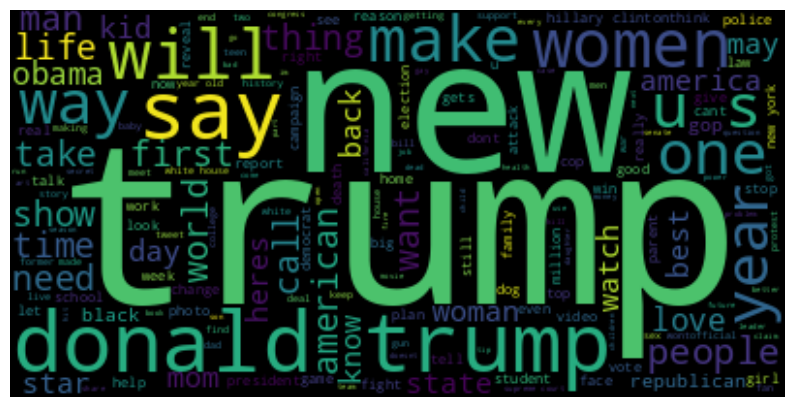

In [16]:
wc(nosarcasm,'black')

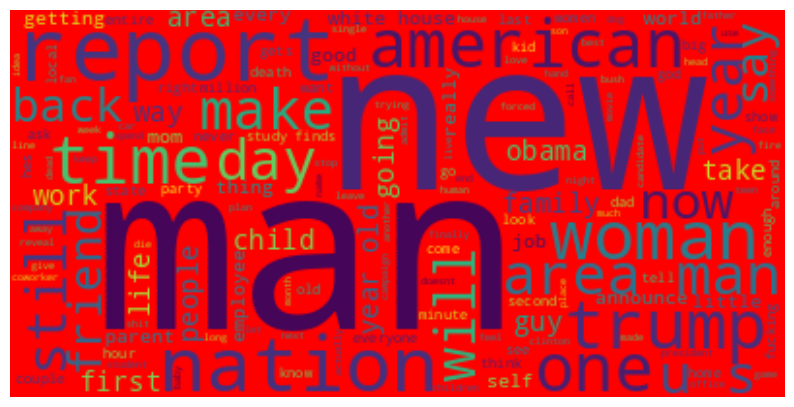

In [17]:
wc(sarcasm,'red')

In [18]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
def lemmafn(text):

    words=TextBlob(text).words

    return[pr.stem(word) for word in words]

In [22]:
vect = CountVectorizer(ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [23]:
x=df['headline']
y=df['is_sarcastic']

In [25]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [26]:
x=vect.fit_transform(x)

In [27]:
x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier",
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)

    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")

    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")

    return metrics.drop("Model", axis=1)

In [29]:
algo_test(x, y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[3853  602]
 [ 773 3358]]
LogisticRegression()  modeli eğitiliyor!..
[[3788  667]
 [ 746 3385]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[3433 1022]
 [1212 2919]]
RandomForestClassifier()  modeli eğitiliyor!..
[[3629  826]
 [ 836 3295]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[2884 1571]
 [ 549 3582]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[3218 1237]
 [1607 2524]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[3595  860]
 [1441 2690]]
MultinomialNB()  modeli eğitiliyor!..
[[3819  636]
 [ 734 3397]]
Eğitim tamamlandı.
En başarılı model:  MultinomialNB
Confusion Matrix:
[[3819  636]
 [ 734 3397]]
classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4455
           1       0.84      0.82      0.83      4131

    accuracy                           0.84      8586
   macro avg       0.84      0.84      0.84      8586
weighted

,Accuracy,Precision,Recall,F1
MultinomialNB,0.840438,0.840438,0.840438,0.840438
BernoulliNB,0.839856,0.839856,0.839856,0.839856
LogisticRegression,0.835430,0.835430,0.835430,0.835430
RandomForestClassifier,0.806429,0.806429,0.806429,0.806429
GradientBoostingClassifier,0.753086,0.753086,0.753086,0.753086
DecisionTreeClassifier,0.739809,0.739809,0.739809,0.739809
AdaBoostClassifier,0.732006,0.732006,0.732006,0.732006
KNeighborsClassifier,0.668763,0.668763,0.668763,0.668763
